# Prerequisites (set up tensorflow/tpu and checkpoints)

In [0]:
from __future__ import print_function
from IPython import display
!git clone https://github.com/tensorflow/tpu
display.clear_output()

# setup path
import sys
sys.path.append('/content/tpu/models/official/efficientnet')
sys.path.append('/content/tpu/models/common')

model_name = 'efficientnet-b0' #@param


# Inference example with pretrained model checkpoint.


--2019-05-24 00:47:44--  https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K   661KB/s    in 0.2s    

2019-05-24 00:47:44 (661 KB/s) - ‘panda.jpg’ saved [116068/116068]



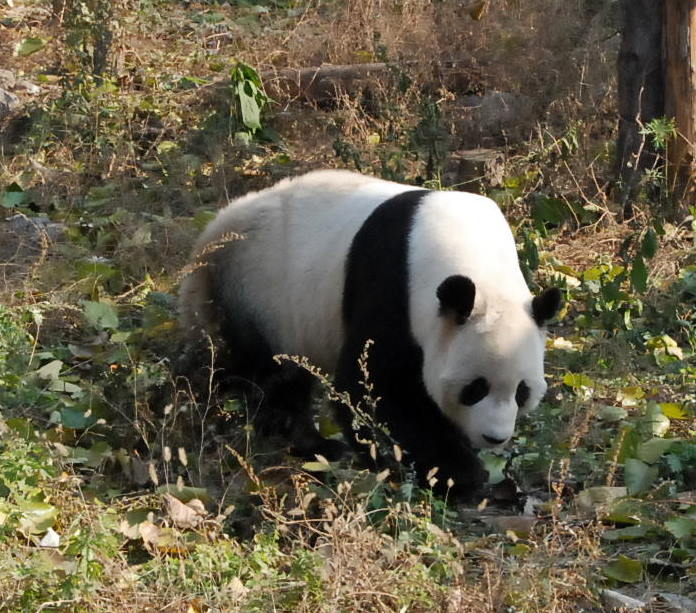

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg
image_file = 'panda.jpg'
display.display(display.Image(image_file))

In [0]:
import  eval_ckpt_main as eval_ckpt
import tensorflow.compat.v1 as tf

!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/ckpts/{model_name}.tar.gz -O {model_name}.tar.gz
!tar xf {model_name}.tar.gz
ckpt_dir = model_name
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt -O labels_map.txt
labels_map_file = 'labels_map.txt'


image_files = [image_file]
eval_driver = eval_ckpt.get_eval_driver(model_name)
pred_idx, pred_prob = eval_driver.eval_example_images(
    ckpt_dir, image_files, labels_map_file)

predicted class for image panda.jpg: 
  -> top_0 (82.75%): giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca  
  -> top_1 (1.51%): ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus  
  -> top_2 (0.37%): lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens  
  -> top_3 (0.23%): American black bear, black bear, Ursus americanus, Euarctos americanus  
  -> top_4 (0.17%): brown bear, bruin, Ursus arctos  
